In [1]:
import pandas as pd
import numpy as np
import os
import names
import json
import timeit
import matplotlib.pyplot as plt
%matplotlib inline

/home/phil/.pyenv/versions/3.7.2/lib/python3.7/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [61]:
# We will compare the time it takes to load files into pandas from a CSV file and Parquet

In [37]:
nrows = [1,2,10,50,100,500,1000, 5000, 10000, 50000, 100000, 500000,1000000, 5000000, 10000000, 50000000]
ncols = [1,2,4,8,16]

In [17]:
for c in ncols:
    for r in nrows:
        df = pd.DataFrame(np.random.normal(size=(r,c)))
        
        #Set the columns name
        df.columns = [f"Col_{i}" for i in range(c)]
        
        #save csv file
        df.to_csv(f'../data/{r}_{c}.csv', index=False)
        
        #save parquet file
        df.to_parquet(f'../data/{r}_{c}.parquet', engine='pyarrow', index=False, compression=None)


In [18]:
## Plotting the size on disk of parquet file vs csv file
size_ratio = {}
for c in ncols:
    size_ratio[f'{c}'] = []
    for r in nrows:
        size_ratio[f'{c}'].append(os.path.getsize(f'../data/{r}_{c}.parquet') / os.path.getsize(f'../data/{r}_{c}.csv'))



In [29]:
with open('../data/size.json', "r") as f:
    size_ratio = json.load(f)


In [ ]:
with open('../data/size_longuer.json', "r") as f:
    size_ratio = json.load(f)

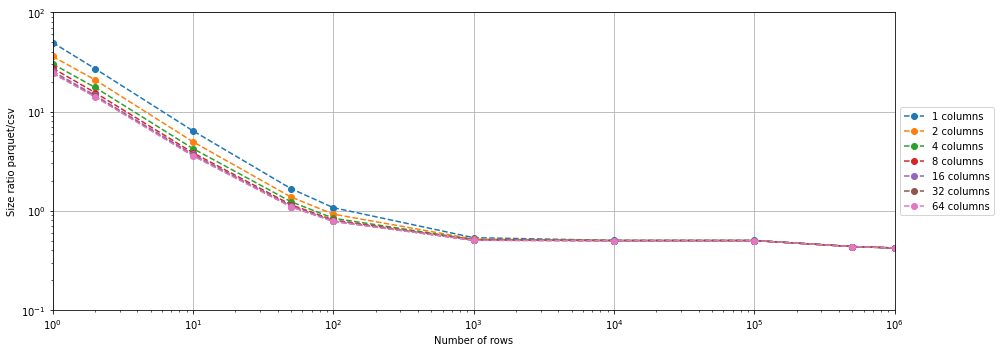

In [36]:
ncols = [1,2,4,8,16,32,64]
nrows = [1,2,10,50,100,1000, 10000, 100000, 500000, 1000000]
fig, ax = plt.subplots(figsize=(14, 5))
for c in ncols:
    ax.plot(nrows, size_ratio[f'{c}'], 'o--')


#ax.axhline(y=0.42, color='k', linestyle='--')
ax.set_xlabel('Number of rows')
ax.set_ylabel('Size ratio parquet/csv')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([0.1,100])
ax.set_xlim([1.0,1e6])
ax.grid(True)
ax.legend([f"{c} columns" for c in ncols], loc='center left',  bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()
#fig.savefig("../figs/size.png", dpi=fig.dpi)

In [66]:
## Loading the CSV or Parquet in memory

In [38]:
N = 10

def load_csv(c, r):
    pd.read_csv(f'../data/{r}_{c}.csv')

def load_parquet(c, r):
    pd.read_parquet(f'../data/{r}_{c}.parquet')

In [39]:
## Plotting the size on disk of parquet file vs csv file Takes a long time.
speed_ratio_longuer = {}
for c in ncols:
    speed_ratio_longuer[f'{c}'] = []
    for r in nrows:
        speed_ratio_longuer[f'{c}'].append(timeit.Timer(lambda: load_csv(c, r)).timeit(N) / timeit.Timer(lambda: load_parquet(c, r)).timeit(N))






MemoryError: Unable to allocate 381. MiB for an array with shape (50000000,) and data type float64

In [12]:

c = 32
r = 100

Nt = 10
print(timeit.Timer(lambda: load_csv(c, r)).timeit(Nt) / timeit.Timer(lambda: load_parquet(c, r)).timeit(Nt))

Nt = 20
print(timeit.Timer(lambda: load_csv(c, r)).timeit(Nt) / timeit.Timer(lambda: load_parquet(c, r)).timeit(Nt))

Nt = 30
print(timeit.Timer(lambda: load_csv(c, r)).timeit(Nt) / timeit.Timer(lambda: load_parquet(c, r)).timeit(Nt))

Nt = 40
print(timeit.Timer(lambda: load_csv(c, r)).timeit(Nt) / timeit.Timer(lambda: load_parquet(c, r)).timeit(Nt))


Nt = 50
print(timeit.Timer(lambda: load_csv(c, r)).timeit(Nt) / timeit.Timer(lambda: load_parquet(c, r)).timeit(Nt))

Nt = 100
print(timeit.Timer(lambda: load_csv(c, r)).timeit(Nt) / timeit.Timer(lambda: load_parquet(c, r)).timeit(Nt))

Nt = 500
print(timeit.Timer(lambda: load_csv(c, r)).timeit(Nt) / timeit.Timer(lambda: load_parquet(c, r)).timeit(Nt))

0.6357911173941917
0.576919732715354
0.6094977417998209
0.602211119654581
0.5955378118924921
0.6221267352045834
0.5965736064002949


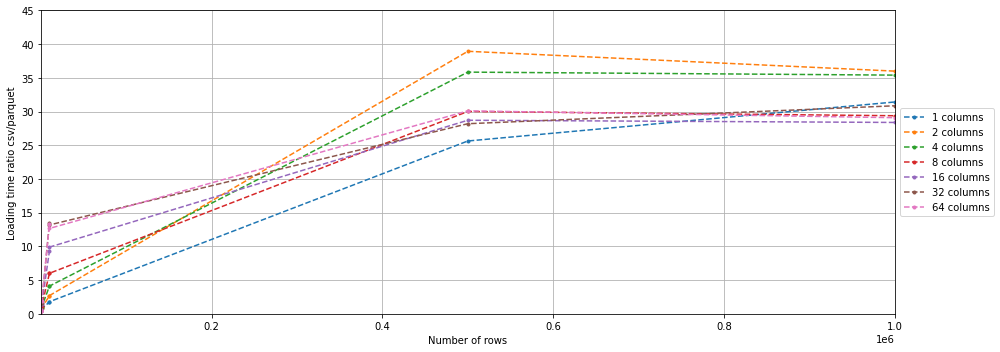

In [125]:

fig, ax = plt.subplots(figsize=(14, 5))
for c in ncols:
    ax.plot(nrows, speed_ratio[f'{c}'], '.--')

ax.set_xlabel('Number of rows')
ax.set_ylabel('Loading time ratio csv/parquet')
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylim([0,45])
ax.set_xlim([1,1e6])
ax.grid(True)
ax.legend([f"{c} columns" for c in ncols], loc='center left',  bbox_to_anchor=(1, 0.5))
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()
plt.show()
fig.savefig("../figs/time_ratio.png", dpi=fig.dpi)


In [ ]:
fig, ax = plt.subplots(figsize=(14, 5))
for c in ncols:
    ax.plot(nrows, speed_ratio_longuer[f'{c}'], 'o--')

ax.set_xlabel('Number of rows')
ax.set_ylabel('Loading time ratio csv/parquet')
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylim([0,45])
ax.set_xlim([1,1e7])
ax.grid(True)
ax.legend([f"{c} columns" for c in ncols], loc='center left',  bbox_to_anchor=(1, 0.5))
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()
plt.show()
fig.savefig("../figs/time_ratio_longuer.png", dpi=fig.dpi)

In [93]:
#Save analysis to disk

with open('../data/size.json', "w") as f:
    json.dump(size_ratio, f)

    
with open('../data/speed.json', "w") as f:
    json.dump(speed_ratio, f)


In [151]:
## Using names columns

for r in nrows:
    df = pd.DataFrame([(names.get_first_name(), names.get_last_name()) for i in range(r)])
        
    #Set the columns name
    df.columns = ["First Name", "Last Name"]
    
    #save csv file
    df.to_csv(f'../data/names_{r}.csv', index=False)
        
    #save parquet file
    df.to_parquet(f'../data/names_{r}.parquet', engine='pyarrow', index=False, compression=None)
    df.to_parquet(f'../data/names_{r}_snappy.parquet', engine='pyarrow', index=False, compression='snappy')

r (1): 44.951219512195124 (1843/41)
r (2): 37.854166666666664 (1817/48)
r (10): 12.700636942675159 (1994/157)
r (50): 3.91448275862069 (2838/725)
r (100): 2.6579129232895644 (3846/1447)
r (1000): 1.2248787005133253 (17419/14221)
r (10000): 0.7372934903764918 (103850/140853)
r (100000): 0.4324645634585752 (609311/1408927)
r (500000): 0.29945938844008974 (2110573/7047944)
r (1000000): 0.27403352030744205 (3863968/14100348)


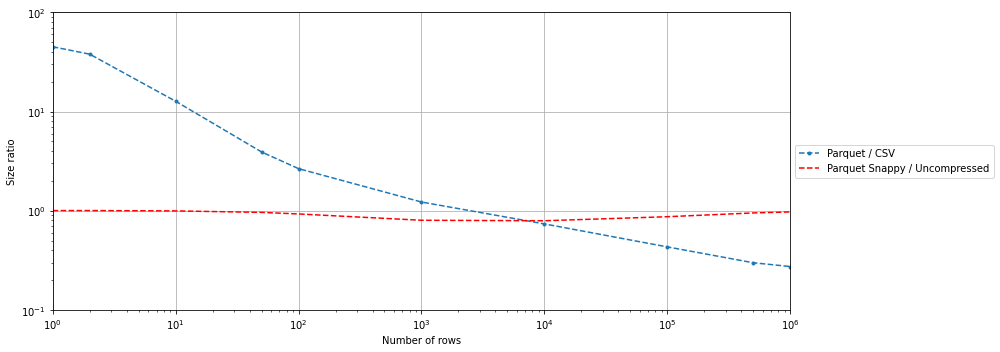

In [153]:
## Plotting the size on disk of parquet file vs csv file
name_size_ratio = []
name_parquet_snappy = []
for r in nrows:
    ratio = os.path.getsize(f'../data/names_{r}.parquet') / os.path.getsize(f'../data/names_{r}.csv')
    print(f"r ({r}): {ratio} ({os.path.getsize(f'../data/names_{r}.parquet')}/{os.path.getsize(f'../data/names_{r}.csv')})")
    name_size_ratio.append(os.path.getsize(f'../data/names_{r}.parquet') / os.path.getsize(f'../data/names_{r}.csv'))
    name_parquet_snappy.append(os.path.getsize(f'../data/names_{r}_snappy.parquet') / os.path.getsize(f'../data/names_{r}.parquet'))

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(nrows, name_size_ratio, 'o--')
ax.plot(nrows, name_parquet_snappy, 'or--')


#ax.axhline(y=0.42, color='k', linestyle='--')
ax.set_xlabel('Number of rows')
ax.set_ylabel('Size ratio')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([0.1,100])
ax.set_xlim([1.0,1e6])
ax.grid(True)
ax.legend(['Parquet / CSV', 'Parquet Snappy / Uncompressed'], loc='center left',  bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()
fig.savefig("../figs/name_size_ratio.png", dpi=fig.dpi)

In [154]:
#Save analysis to disk

with open('../data/name_size_ratio.json', "w") as f:
    json.dump(name_size_ratio, f)

    
with open('../data/name_parquet_snappy.json', "w") as f:
    json.dump(name_parquet_snappy, f)


In [3]:
N = 500

def load_name_csv(r):
    pd.read_csv(f'../data/names_{r}.csv')

def load_name_parquet(r):
    pd.read_parquet(f'../data/names_{r}.parquet')

def load_name_parquet_snappy(r):
    pd.read_parquet(f'../data/names_{r}_snappy.parquet')
    
## Plotting the size on disk of parquet file vs csv file Takes a long time.
csv_name_speed = []
parquet_name_speed = []
parquet_snappy_name_speed = []
for r in nrows:
    csv_name_speed.append(timeit.Timer(lambda: load_name_csv(r)).timeit(N)/N)
    parquet_name_speed.append(timeit.Timer(lambda: load_name_parquet(r)).timeit(N)/N)
    parquet_snappy_name_speed.append(timeit.Timer(lambda: load_name_parquet_snappy(r)).timeit(N)/N)
    
    print(f"Did {r}")



Did 1
Did 2
Did 10
Did 50
Did 100
Did 1000
Did 10000
Did 100000
Did 500000
Did 1000000


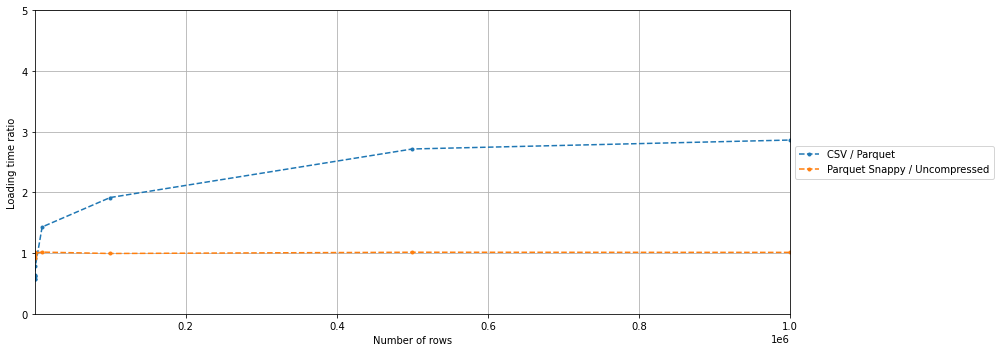

In [5]:
fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(nrows, np.divide(csv_name_speed, parquet_name_speed), '.--')
ax.plot(nrows, np.divide(parquet_snappy_name_speed, parquet_name_speed), '.--')


ax.set_xlabel('Number of rows')
ax.set_ylabel('Loading time ratio')
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylim([0,5])
ax.set_xlim([1,1e6])
ax.grid(True)
ax.legend(['CSV / Parquet', 'Parquet Snappy / Uncompressed'], loc='center left',  bbox_to_anchor=(1, 0.5))
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()
plt.show()
fig.savefig("../figs/name_time_ratio.png", dpi=fig.dpi)

In [4]:
nrows = [1,2,10,50,100,500,1000, 5000, 10000, 50000, 100000, 500000,1000000, 5000000, 10000000, 50000000]
ncols = [1,2,4,8,16, 32, 64]

In [29]:
for c in ncols:
    for r in nrows:
        df = pd.DataFrame(np.random.randint(10,size=(r,c), dtype='int8'), dtype='int8')
        
        #Set the columns name
        df.columns = [f"Col_{i}" for i in range(c)]
        
        #save csv file
        df.to_csv(f'../data/int_{r}_{c}.csv', index=False)
        
        #save parquet file
        df.to_parquet(f'../data/int_{r}_{c}.parquet', engine='pyarrow', index=False, compression=None)


In [24]:
df = pd.read_parquet(f'../data/int_{r}_{c}.parquet')
print(df.dtypes)    

Col_0    int8
Col_1    int8
Col_2    int8
Col_3    int8
Col_4    int8
Col_5    int8
Col_6    int8
Col_7    int8
Col_8    int8
Col_9    int8
dtype: object


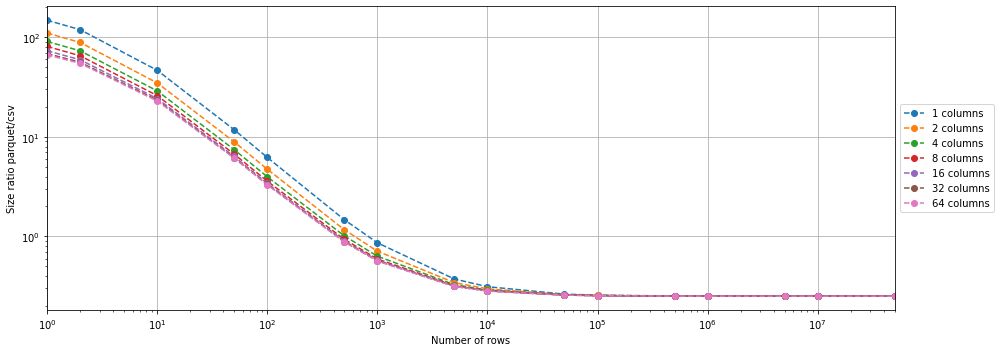

In [46]:
## Plotting the size on disk of parquet file vs csv file
int_size_ratio = {}
for c in ncols:
    int_size_ratio[f'{c}'] = []
    for r in nrows:
        int_size_ratio[f'{c}'].append(os.path.getsize(f'../data/int_{r}_{c}.parquet') / os.path.getsize(f'../data/int_{r}_{c}.csv'))
        #int_size_ratio[f'{c}'].append(os.path.getsize(f'../data/int_{r}_{c}.csv') / os.path.getsize(f'../data/int_{r}_{c}.parquet'))

        
#Save analysis to disk

with open('../data/int_size.json', "w") as f:
    json.dump(int_size_ratio, f)

        

fig, ax = plt.subplots(figsize=(14, 5))
for c in ncols:
    ax.plot(nrows, int_size_ratio[f'{c}'], 'o--')


#ax.axhline(y=0.42, color='k', linestyle='--')
ax.set_xlabel('Number of rows')
ax.set_ylabel('Size ratio parquet/csv')
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_ylim([0.1,1000])
ax.set_xlim([1.0,5e7])
ax.grid(True)
ax.legend([f"{c} columns" for c in ncols], loc='center left',  bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()
fig.savefig("../figs/int_size.png", dpi=fig.dpi)

In [ ]:
N = 10

def load_int_csv(c, r):
    pd.read_csv(f'../data/int_{r}_{c}.csv', dtype=np.int8)

    
def load_int_parquet(c, r):
    pd.read_parquet(f'../data/int_{r}_{c}.parquet')


## Plotting the size on disk of parquet file vs csv file Takes a long time.
int_ratio_longuer = {}
for c in ncols:
    int_ratio_longuer[f'{c}'] = []
    for r in nrows:
        int_ratio_longuer[f'{c}'].append(timeit.Timer(lambda: load_int_csv(c, r)).timeit(N) / timeit.Timer(lambda: load_int_parquet(c, r)).timeit(N))

In [3]:
timeit.Timer(lambda: load_int_csv(64, 10000000)).timeit(1)

11.647746799979359

In [10]:
["int8"].repeat(4)

AttributeError: 'list' object has no attribute 'repeat'

In [11]:
['int8' for x in range(4)]

['int8', 'int8', 'int8', 'int8']

In [16]:
[{f"Col_{i}" : np.int8} for i in range(2)]

[{'Col_0': numpy.int8}, {'Col_1': numpy.int8}]